In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Names of all group members: Josephine Brozny, ...

# Lab 1
In this lab, we'll follow in the steps of Hertzsprung and Russell and make a color-magnitude diagram showing the different populations of stars commonly observed in the Milky Way.

Before starting, you'll need to download a Gaia DR2 data file and read about the data format and description of variables:
### Gaia filters: https://www.cosmos.esa.int/web/gaia/iow_20180316
### data release 2 (DR2): https://www.cosmos.esa.int/web/gaia/data-release-2
### data file download (pick any files): http://cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source/csv/
### data format description: https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

You'll also want to make sure you run the cell above to import the modules you will need to process/plot the data.

#### 1. Read in the data
Download a file from the link and save it someplace useful (moving the file to this directory will be easiest). The file should be named something like:
GaiaSource-1000172165251650944-1000424567594791808.csv.

```python
data_file = 'Path/to/file.csv' #if you saved this in local directory just put the file name
```

we can read in the CSV data file using pandas

In [5]:
data_file = 'GaiaSource_1000172165251650944_1000424567594791808.csv.gz'
data = pd.read_csv(data_file)

**2. Make sure it worked and inspect data**

You can look at the variables in the file using `data.keys()` -- check to make sure the fields you imported match the data format description above. You can check the integrity of a specific category (ie make sure it actually imported sensible numbers) by running something like `print(data.NameOfField)`. Do this below:

In [6]:
#check the data key/field
print(data.keys)

<bound method NDFrame.keys of                solution_id                   designation            source_id  \
0      1635721458409799680  Gaia DR2 1000225938242805248  1000225938242805248   
1      1635721458409799680  Gaia DR2 1000383512003001728  1000383512003001728   
2      1635721458409799680  Gaia DR2 1000274106300491264  1000274106300491264   
3      1635721458409799680  Gaia DR2 1000396156385741312  1000396156385741312   
4      1635721458409799680  Gaia DR2 1000250024419296000  1000250024419296000   
...                    ...                           ...                  ...   
14204  1635721458409799680  Gaia DR2 1000277473554949120  1000277473554949120   
14205  1635721458409799680  Gaia DR2 1000376159018113152  1000376159018113152   
14206  1635721458409799680  Gaia DR2 1000390414013986304  1000390414013986304   
14207  1635721458409799680  Gaia DR2 1000261427557282560  1000261427557282560   
14208  1635721458409799680  Gaia DR2 1000289190225324288  1000289190225324288  

**3. Filtering the data**

Sometimes the data might include values that could not be properly calculated for some reason. These will be listed as "NAN" (not a number) and we want to discard these rows. Pandas has a nice built in methodology for doing this -- if you have some data in a data frame `df` you can drop all the names like:

```python
df = df.dropna()
```

We ***don't*** want to run this command on the entire dataset, however, because we only care if there's a NAN in a column we care about (this command deletes the entire row wherever it finds a NAN, so we could delete a lot of "good" rows by running it on the entire dataset as we don't care if certain data is missing). 

Instead we want to create a new data frame with just the fields we are going to need during lab, and then drop the NANs from that set. We can accomplish this with the `filter` keyword, ie:
```python
filteredDF = originalDF.filter(['columnName1','columnName2','columnName3'],axis=1) 
#axis tells it whether to cut by column or row
```

To complete this lab you will need **four things from the Gaia data-set**: a measure of the magnitude of flux from the green filter, a measure of the blue band - the red band, the parallax angle, and the ratio of the measured parallax to the associated error. 

Find what these things should be called in the data format description link above, then create a new filtered data frame with just these four items using the code above as an example. Then drop the NANs from this new, filtered data frame by using the code snippet at the top of the cell.

In [7]:
#create a new DataFrame with just the relevant fields, then drop any NANs that might be present
filteredDF = data.filter(['parallax', 'parallax_over_error', 'phot_g_mean_flux', 'bp_rp'],axis=1)
filteredDf = filteredDF.dropna()
print(filteredDF)


       parallax  parallax_over_error  phot_g_mean_flux     bp_rp
0      0.582790             8.286691       9268.427339  0.836315
1      1.385686            58.609123      94231.473584  0.859184
2      0.314035             0.351005        214.120845  2.126473
3      1.939951             1.672998        117.648894  1.995594
4      0.747108            20.524510      34481.065597  0.788165
...         ...                  ...               ...       ...
14204  0.635295             2.499070        791.764359  1.021986
14205 -5.242704            -2.281596         97.101369       NaN
14206 -0.339148            -0.845154        429.954097  1.482681
14207  1.992706             2.579039        132.573123  1.819048
14208  0.438020             2.131173        732.076742  1.684008

[14209 rows x 4 columns]


### A color-magnitude diagram is a plot of absolute magnitude vs. stellar color

We will therefore need to use the subset of Gaia measurements to infer these quantities

#### 4. Calculate a photometric color as the Gaia measurements of "Blue - Red" filters = Bp - Rp
This should be one of the fields you kept when you filtered the data in step 3. We are going to want to operate on this specifically, so it will be useful for us to extract it as its own variable separate from teh data frame. Insert your code for doing this below, assigning the result to a variable with a name like `BlueMinusRed`. 

In [8]:
#extract photometric color from DataFrame
BlueMinusRed = filteredDf['bp_rp']
print(BlueMinusRed)

0        0.836315
1        0.859184
2        2.126473
3        1.995594
4        0.788165
           ...   
14203    1.086035
14204    1.021986
14206    1.482681
14207    1.819048
14208    1.684008
Name: bp_rp, Length: 12557, dtype: float64


#### 5. Gaia reports the apparent magnitudes. To convert to absolute magnitude, we need to know the distance to each star.
Gaia is an astrometric mission which makes very sensitive measurements of parallax as described in the pre-lab video. The parallax is 1/distance. Use the Gaia parallax saved in your filtered data frame (from step 3) to calculate distances to each star and call the resulting variable something like `distance`.

Calculate your distances in pc -- make sure to note what units Gaia uses for parallax!

In [9]:
#calculate distances from parallax 
distance = 1/(filteredDf['parallax'])
parallax = distance*1000
print(parallax)

0        1715.882842
1         721.664114
2        3184.361663
3         515.477011
4        1338.495369
            ...     
14203    2889.540562
14204    1574.072802
14206   -2948.569228
14207     501.830294
14208    2283.001743
Name: parallax, Length: 12557, dtype: float64


#### 5. We can then use the measured distances to convert apparent to observed magnitudes
There are many ways to do this, e.g. we could convert the apparent magnitudes to flux and then scale by the distance squared. The easiest way though is to use the "distance modulus" -- as discussed in the pre-lab video we can use this quantity to convert apparent --> absolute magnitude.

Convert the Gaia G band apparent magnitude measurements to absolute G magnitudes and assign the result to a variable with a name like `GAbsMag`.

In [10]:
#calculate abolute magnitudes here
apparentmag = -2.5*np.log(filteredDf['phot_g_mean_flux'])
GAbsMag = -(5*np.log(distance/10)) + apparentmag
print(GAbsMag)

0       -14.022636
1       -15.489871
2        -7.694685
3         2.906977
4       -16.065219
           ...    
14203   -17.146447
14204    -7.441066
14206          NaN
14207     2.742556
14208    -9.104244
Length: 12557, dtype: float64


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### 6. Signal-to-noise cut
We only want to use data where the parallax (and so distance) is well measured
We will define "good" data points as parallax signal-to-noise. You can define that cut using a conditional statement, ie 
`parallax_over_error > 4.0`.
and assign the result to a variable `goodInd`. 

This defines a variable which is ```True``` if `parallax_over_error > 4.0` and `False` otherwise for all the possible indices of your data.

To select only the good data points, you can then write `list[good]`. This is similar to how `list[0]` takes the first thing from a list -- `list[good]` is a powerful (and Pythonic) way of selecting many entries from a list based on the list generated when you run `parallax_over_error > 4`.


In [17]:
#create a goodInd list to keep track of the places where the SNR is > 4
goodInd = filteredDf['parallax_over_error'] > 4.0
goodnum = GAbsMag[goodInd]
goodnums2 = BlueMinusRed[goodInd]
print(goodnums2)

0        0.836315
1        0.859184
4        0.788165
5        0.889985
7        0.998480
           ...   
14181    2.886442
14197    1.693439
14198    1.276336
14199    0.912789
14203    1.086035
Name: bp_rp, Length: 3660, dtype: float64


#### 7. Color-magnitude diagram
Plot your ***good*** absolute magnitude measurements vs. photometric color for all stars in your file. Remember you can select just the good measurements by indexing with the variable you created in the cell above.

By default `plt.plot()` makes lines connecting points, which obviously we do not want for this plot... There are two "simple" ways to plot dots without connecting lines, as the examples below show:

1. Using extra parameters in `plt.plot()`

```python
plt.plot(x,y,marker='.',linestyle='') #specifies no line ('') and to use a small dot at each point ('.')
```

2. Using `plt.scatter()`
```python
plt.scatter(x,y,s=3) #generates a scatter plot, s is an optional parameter that controls dot size
```

You'll want to change the axis so that the brightness of stars is increasing going up (recall what that means for magnitudes). You can explicitly specify the limits with `plt.ylim()` to change the y-axis (putting the bigger number first will make that number the bottom limit and make it run in "reverse"). 

Don't forget to add a descriptive title and label the axes!

**Bonus:** use a colormap to make your plot closer to the ones you've likely seen in your textbooks (ie cool stars red, hot stars blue, middle stars yellow, etc.)

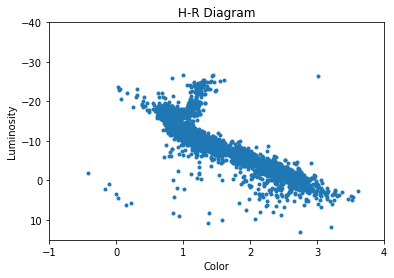

In [41]:
#make your plot here!
plt.title("H-R Diagram")
plt.xlabel("Color")
plt.ylabel("Luminosity")
plt.xlim(-1, 4)
plt.ylim(15, -40)
plt.plot(goodnums2,goodnum, marker='.', linestyle='')
plt.show()

#### 8. Interpretation

Color-magnitude diagrams are used to classify populations of stars and understand their properties. Here we'll start to think about why they might be useful. Answer the following questions in the markdown cells provided after each.

#### a) Compare with your "neighbor(s)" -- do your plots look the same? Comment on any differences you notice.

In [ ]:
Our plots look almost identical with the exception of some ourliers. For example the point on my graph (3, -30)
does not show up on my peers graphs, but this is understandable considering our data is different. There is also a small distortion to
our graphs in the x or y axis, but again is understandable due to having different x and y axes.

#### b) What do your x- and y-axis mean?

Using the concepts of absolute magnitude and color temperature, think about what your plotted axes represent physically. 

Where are the most luminous stars on your plot? Where are the hottest stars?

In [ ]:
Hotter and dimmer stars appear in the lower left quadrant, hotter and brighter stars appear in the upper left quadrant,
cooler and dimmer stars appear in the lower right quadrant, and cooler and brighter stars appear in the upper right quadrant.

#### c) Stellar radius

Using the definition of effective temperature, $L = 4\pi R^2 \sigma_b T_{\rm eff}^4$, and your answers to part i), we can also use this diagram to infer the stellar radius $R$ at each point.

Where are the largest stars on the diagram? Where are the smallest stars? Bonus: how should lines of constant $R$ look on the diagram?

In [ ]:
The largest stars on the diagram appear in the upper right representing giants and supergiants which are large, and very luminous 
despite being lower temperature. Smallest stars appear in the lower left quadrant representing white dwarf stars which are small and not 
very luminous,despite having a high temperature. Lines of constant R occur at a steady slope down from upper left to lower right, following 
the main sequence.

#### d) Stellar populations

On your diagram, do the stars uniformly fill the available space? Where are most of them located? Circle what you might describe as "populations" of stars in different regions of the diagram. There should be at least 3.

Which of your populations contain the most stars, and what does that mean?

In [ ]:
Stars on the diagram do not uniformly fill in the available space. Most stars follow the main sequence and remain there for maority
of their lifespan. This spans from upper left to lower right. The main sequence shows the stages a star passes through in its lifetime. 
The top center/right can be circled to show supergiants, upper/middle center/right can be circled to show giants, and lower left can be 
circled to show white dwarfs.